In [1]:
from pydataset import data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv("sephora_website_dataset.csv")

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Tabla de contingencia
Coeficiente de correlación de las variables numéricas del dataset.
Sesgos de alguna de las variables numéricas del dataset.
Intervalo de confianza de algunas de las variables numéricas del dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [12]:
df.describe(include=object)

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
unique,324,143,9106,1623,9168,10,564,8839,6497,6962
top,SEPHORA COLLECTION,Perfume,Blush,no size,https://www.sephora.com/product/blu-mediterran...,0,no options,no details,no instructions,unknown
freq,496,665,4,3161,1,4786,8377,14,1573,1630


In [58]:
#tabla de contingencia
tabla_contingencia= pd.crosstab (df['brand'], df['category'])
tabla_contingencia.head(3)

category,Accessories,After Sun Care,Aftershave,Anti-Aging,BB & CC Cream,BB & CC Creams,Bath & Body,Bath & Shower,Bath Soaks & Bubble Bath,Beauty Supplements,...,Spa Tools,Sponges & Applicators,Sunscreen,Teeth Whitening,Tinted Moisturizer,Toners,Tweezers & Eyebrow Tools,Value & Gift Sets,Wellness,no category
brand,,,,,,,,,,,,,,,,,,,,,
8Greens,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
AERIN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ALTERNA Haircare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [59]:
tabla_contingencia.columns

Index(['Accessories', 'After Sun Care', 'Aftershave', 'Anti-Aging',
       'BB & CC Cream', 'BB & CC Creams', 'Bath & Body', 'Bath & Shower',
       'Bath Soaks & Bubble Bath', 'Beauty Supplements',
       ...
       'Spa Tools', 'Sponges & Applicators', 'Sunscreen', 'Teeth Whitening',
       'Tinted Moisturizer', 'Toners', 'Tweezers & Eyebrow Tools',
       'Value & Gift Sets', 'Wellness', 'no category'],
      dtype='object', name='category', length=143)

In [42]:
tabla_contingencia2= pd.crosstab (df['MarketingFlags_content'], df['brand'])
tabla_contingencia2.head(2)

brand,8Greens,AERIN,ALTERNA Haircare,AMOREPACIFIC,Acqua Di Parma,Aether Beauty,Algenist,Alpha-H,Anastasia Beverly Hills,Anthony,...,lilah b.,lululemon selfcare,philosophy,rag & bone,rms beauty,shu uemura,stila,surratt beauty,tarte,trèStiQue
MarketingFlags_content,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,22,1,3,26,3,57,12,...,10,0,66,0,8,31,7,22,92,2
exclusive,0,0,0,2,0,0,18,1,1,0,...,0,0,1,6,1,0,0,2,38,0


In [60]:
tabla_contingencia2.columns

Index(['8Greens', 'AERIN', 'ALTERNA Haircare', 'AMOREPACIFIC',
       'Acqua Di Parma', 'Aether Beauty', 'Algenist', 'Alpha-H',
       'Anastasia Beverly Hills', 'Anthony',
       ...
       'lilah b.', 'lululemon selfcare', 'philosophy', 'rag & bone',
       'rms beauty', 'shu uemura', 'stila', 'surratt beauty', 'tarte',
       'trèStiQue'],
      dtype='object', name='brand', length=324)

In [10]:
#para sacar una tabla de contingencia mejor vamos a convertir cunatitativa en categorica
#lo hacemos con la col love y para ello investigamos un poco los estadisticos de esa col
print(df['love'].max())
print(df['love'].median())
print(df['love'].mean())

1300000
4800.0
16278.585078534032


In [23]:
# definimos una función que nos divida los datos en categorias
def categoria_love (col):
    if col <= 4800:
        return "bajo"
    elif col > 4800 and col <= 16278:
        return "medio"
    else:
        return "alto"

In [24]:
df['love_cat'] = df['love'].apply(categoria_love)

In [25]:
#y repetimos la operacion para la categoria de precio
max= df['price'].max()
mediana = df['price'].median()
media= df['price'].mean()
print (max)
print(media)
print(mediana)

549.0
50.06323734729494
35.0


In [26]:
#categorizamos el precio
def categoria_precio (col):
    if col <= mediana:
        return "bajo"
    elif col > mediana and col <= media:
        return "medio"
    else:
        return "alto"

In [27]:
df['price_cat'] = df['price'].apply(categoria_precio)

In [28]:
df_contingencia = pd.crosstab(df['love_cat'], df['price_cat']) 
df_contingencia

price_cat,alto,bajo,medio
love_cat,,,
alto,363,1180,469
bajo,1686,2167,773
medio,681,1359,490


En esta tabla vemos como la mayoria de productos que cuentan con alto numero de 'loves' no se corresponden con los que tienen alto precio, sino más bien al contrario, con los que tienen precio bajo (siempre según los rangos de ambas variables establecidos por nosotras mismas) . Sin embargo, los que cuentan con menos 'loves' no son los productos más caros o los más baratos, como cabría esperar, sino que son los productos de precio medio los que parece que no despiertan ningun 'amor'.

In [18]:
#Coeficiente de correlación de las variables numéricas del dataset
matriz_correlacion = df.corr()
matriz_correlacion

,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.176684,-0.175482,-0.104208,-0.026661,-0.004168,0.283722,0.153745,0.199285,0.200357,-0.008607
rating,-0.176684,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,-0.175482,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742
love,-0.104208,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879
price,-0.026661,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679
value_price,-0.004168,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874
MarketingFlags,0.283722,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908
online_only,0.153745,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023
exclusive,0.199285,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814
limited_edition,0.200357,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129


<AxesSubplot:>

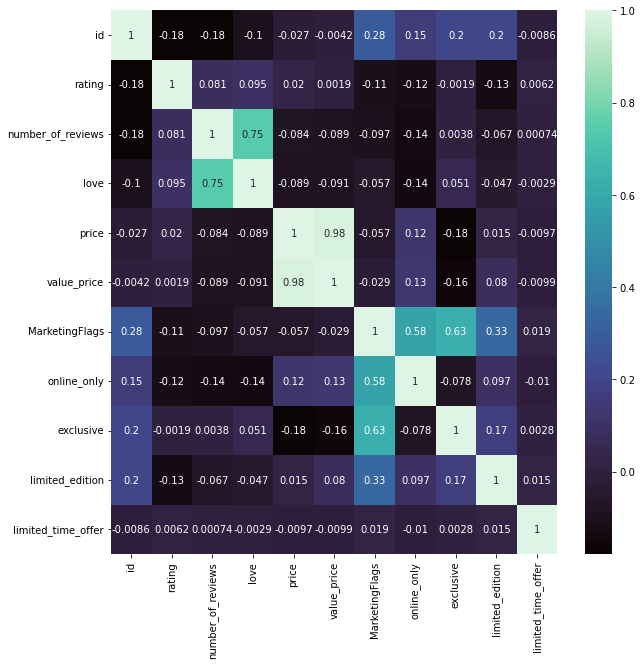

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_correlacion, cmap='mako', annot=True)

De esta matriz concluimos que los valores con mayor corelación son los de price y value-price, con un 0.98 y los de love y number of reviews. La primera esta clara pero en el segundo caso, cabria pensar que a mayor numero de reseñas, mayor numero de 'loves'. ¿Será que la mayoría de las reseñas son favorables? ¿o simplemente es una cuestión de probabilidad? Necesitariamos tener los datos de 'hates' para averiguarlo.

In [21]:
#Sesgos de alguna de las variables numéricas del dataset.
skewness = skew(df['price'])
skewness

3.1722892366379725

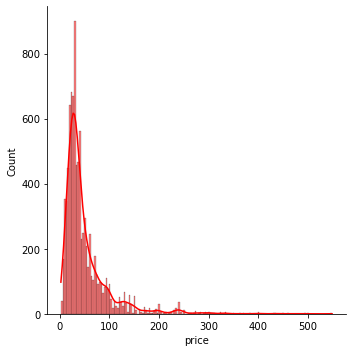

In [25]:
#comprobamos el sesgo en la grafica displot
sns.displot(df["price"], 
            color = "red");


La distribución de los precios de la muestra es positiva, ya que en la grafica se ve claramente cómo la cola de la derecha es más larga que la de la izquierda. En este caso no podría ser de otra manera porque estamos hablando de precios de venta al publico, nunca pueden ser negativos.

In [29]:
#Intervalo de confianza de algunas de las variables numéricas del dataset
datos = df['price']
print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

#el intervalo de confianza esta entre 49.09765821224322, 51.02881648234661 al 95% y comprobamos con la media
media= np.mean(datos)
media

(49.09765821224322, 51.02881648234661)


50.063237347294915

En base a los datos de esta muestra, existe un 95% de probabilidades de que el precio de los productos de Sephora esté entre 49 euros y 51. Así lo indica el intervalo de confianza.